In [2]:
#load file
file_path = './train.docs'
text = ''
with open(file_path, 'r') as f:
    text = f.read()
print(text)

MED-10	statin breast cancer survival nationwide cohort study finland abstract recent studies suggested statins established drug group prevention cardiovascular mortality delay prevent breast cancer recurrence effect disease-specific mortality remains unclear evaluated risk breast cancer death statin users population-based cohort breast cancer patients study cohort included newly diagnosed breast cancer patients finland num num num cases identified finnish cancer registry information statin diagnosis obtained national prescription database cox proportional hazards regression method estimate mortality statin users statin time-dependent variable total num participants statins median follow-up num years diagnosis range num num years num participants died num num due breast cancer adjustment age tumor characteristics treatment selection post-diagnostic pre-diagnostic statin lowered risk breast cancer death hr num num ci num num hr num num ci num num risk decrease post-diagnostic statin affe

In [3]:
#split file
import re
splited_array = re.split(r'\bMED+-\d+\b', text) #text.split(r'\bMED+-\d+\b')
array_of_arrays = []
for doc in splited_array:
    doc_array = []
    doc_array.append(doc)
    array_of_arrays.append(doc_array)




In [4]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Assuming array_of_arrays contains your tokenized documents

# Tag documents
tagged_data = [TaggedDocument(words=d, tags=[str(i)]) for i, d in enumerate(array_of_arrays)]

# Train Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=100, window=2, min_count=1, epochs=100)

# Infer vectors for all documents
doc_vectors = [model.infer_vector(doc.words) for doc in tagged_data]

# Calculate average token vectors for each document



In [5]:
average_vectors = []
for vector in doc_vectors:
        average = []
        average_vector = np.mean(vector)
        average.append(average_vector)
        average_vectors.append(average)

# Convert average_vectors to a NumPy array
average_vectors_array = np.array(average_vectors)
for vector in average_vectors_array:
    print(vector)


[-0.00093083]
[-2.5100084e-05]
[-8.5646876e-05]
[0.00087259]
[-0.00028587]
[-0.00056912]
[-0.00015766]
[0.00065556]
[5.868366e-05]
[-2.1256381e-05]
[-9.3105984e-05]
[9.925278e-05]
[-0.00032687]
[-0.00030561]
[-0.0006902]
[-0.00021505]
[0.00012019]
[-0.00010949]
[-0.00017027]
[-0.00041288]
[-0.00047073]
[-0.0004416]
[-2.6240548e-05]
[0.00033966]
[-0.00047949]
[-5.5141943e-05]
[-0.00076733]
[-0.00016038]
[0.00043858]
[0.00066246]
[0.00012202]
[0.00018618]
[0.00058129]
[0.0005482]
[-0.00014814]
[-9.009432e-05]
[-0.00012692]
[-0.00022544]
[9.4376504e-05]
[-0.00028116]
[-0.00017707]
[4.915772e-05]
[-0.00031223]
[-4.5155277e-05]
[-0.00029155]
[0.00045095]
[0.00020509]
[-0.00067612]
[-0.00016761]
[-0.00086232]
[0.00051982]
[-6.21374e-06]
[0.0006031]
[0.00029029]
[0.00068524]
[-0.000241]
[-7.0323214e-05]
[-0.00112589]
[-9.722229e-05]
[2.7716313e-05]
[-8.694755e-05]
[0.00021999]
[0.00012192]
[-0.00051326]
[0.00011763]
[-0.00051384]
[0.00021705]
[-0.00078903]
[-0.00073549]
[-0.00091153]
[-0.0007

c:\Users\abdel rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abdel rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abdel rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abdel rahman\AppData\Local\Programs\Python\Python311\Li

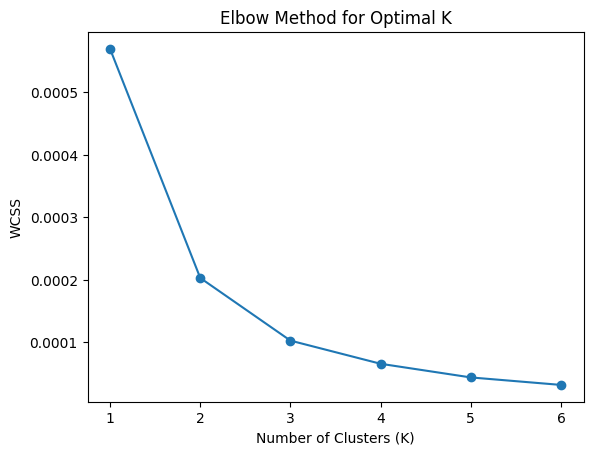

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X is your data

wcss = []
# Choose a range of K values
k_values = range(1, 7)

# Fit K-means for each K value and compute WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(average_vectors_array)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()



In [22]:
from sklearn.cluster import KMeans
k = 10 # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(average_vectors_array)
cluster_labels = kmeans.labels_

# Print cluster assignments
for i, label in enumerate(cluster_labels):
    print("Document", i, "is assigned to cluster", label)

Document 0 is assigned to cluster 7
Document 1 is assigned to cluster 5
Document 2 is assigned to cluster 2
Document 3 is assigned to cluster 3
Document 4 is assigned to cluster 6
Document 5 is assigned to cluster 1
Document 6 is assigned to cluster 2
Document 7 is assigned to cluster 8
Document 8 is assigned to cluster 5
Document 9 is assigned to cluster 5
Document 10 is assigned to cluster 2
Document 11 is assigned to cluster 9
Document 12 is assigned to cluster 6
Document 13 is assigned to cluster 6
Document 14 is assigned to cluster 4
Document 15 is assigned to cluster 2
Document 16 is assigned to cluster 9
Document 17 is assigned to cluster 2
Document 18 is assigned to cluster 2
Document 19 is assigned to cluster 1
Document 20 is assigned to cluster 1
Document 21 is assigned to cluster 1
Document 22 is assigned to cluster 5
Document 23 is assigned to cluster 0
Document 24 is assigned to cluster 1
Document 25 is assigned to cluster 5
Document 26 is assigned to cluster 4
Document 27

c:\Users\abdel rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


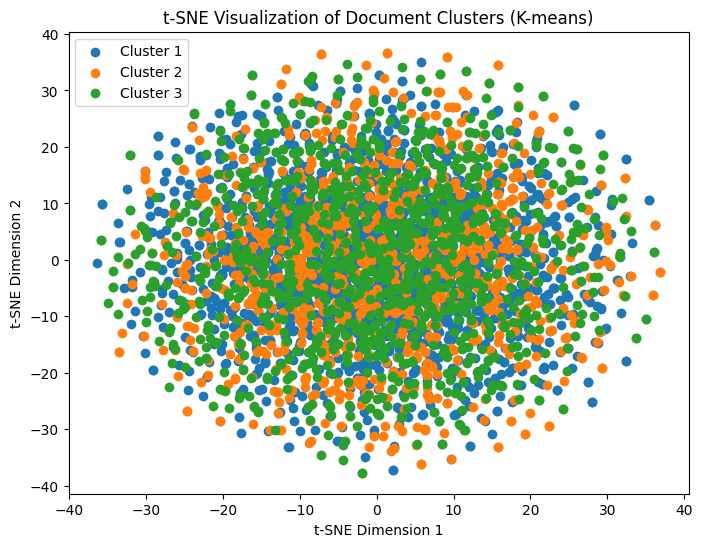

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert doc_vectors to a NumPy array
doc_vectors_array = np.array(doc_vectors)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
doc_vectors_2d = tsne.fit_transform(doc_vectors_array)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(doc_vectors_2d[cluster_labels == i, 0], doc_vectors_2d[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title('t-SNE Visualization of Document Clusters (K-means)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()



In [29]:
# Assign each data point to its corresponding cluster
labels = kmeans.labels_

# Specify the cluster number you're interested in
specific_cluster_number = 9  # Change this to the cluster number you want to visualize

# Filter the data points belonging to the specific cluster
specific_cluster_data = average_vectors_array[labels == specific_cluster_number]

# Now you can visualize or analyze the specific cluster data
print("Data points in Cluster {}: {}".format(specific_cluster_number, len(specific_cluster_data)))
print(specific_cluster_data)

Data points in Cluster 9: 471
[[9.92527785e-05]
 [1.20187717e-04]
 [1.22021884e-04]
 [1.86178353e-04]
 [9.43765044e-05]
 [2.05086792e-04]
 [2.19991372e-04]
 [1.21924990e-04]
 [1.17630443e-04]
 [2.17050707e-04]
 [1.22367870e-04]
 [1.25341452e-04]
 [1.76158821e-04]
 [1.54843161e-04]
 [1.18204065e-04]
 [1.47747473e-04]
 [2.16594883e-04]
 [2.07278528e-04]
 [2.37195229e-04]
 [2.01037881e-04]
 [9.65371146e-05]
 [1.45810511e-04]
 [7.83115902e-05]
 [9.53143099e-05]
 [1.72587228e-04]
 [1.11308742e-04]
 [1.41456010e-04]
 [2.15112188e-04]
 [2.21510825e-04]
 [9.94312650e-05]
 [1.81232070e-04]
 [1.12034119e-04]
 [2.15700828e-04]
 [2.39936708e-04]
 [9.86301966e-05]
 [1.75213994e-04]
 [1.93938467e-04]
 [9.18920705e-05]
 [1.56018679e-04]
 [2.34099163e-04]
 [1.00741534e-04]
 [2.32588747e-04]
 [7.90146732e-05]
 [2.21254304e-04]
 [1.53769346e-04]
 [2.01421746e-04]
 [9.47496010e-05]
 [2.10581667e-04]
 [8.35164174e-05]
 [8.83676767e-05]
 [1.58537368e-04]
 [2.27005512e-04]
 [1.55431975e-04]
 [1.29557404e-04